# April ??th, 2022 (register RABIES)

**Motivation**: Run the big loop and save tx for session 2 only. <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from numpy.ma import masked_where as mwh
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
fig_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = 'Documents/workspaces/lfr/binary_overlapping'
lfr_dir = pjoin(os.environ['HOME'], lfr_dir)

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# set style & no interpolalation
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((128), full_load=True, load_parcel=True, load_allen=True)
mice.setup_anat_data()

[PROGRESS] 'config.json' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.25, 0.30, 0.35, 0.38, 0.40, 0.42, 0.45, 0.5, 0.60],
    'syn_bins': [64, 48, 32],
    'aff_bins': [13, 20, 25, 32],
    'aff_rates': [0.2, 0.4, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.25, 0.3, 0.35, 0.38, 0.4, 0.42, 0.45, 0.5, 0.6],
    'syn_bins': [64, 48, 32],
    'aff_bins': [13, 20, 25, 32],
    'aff_rates': [0.2, 0.4, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [4]:
from register.register import *
reg = Register(mice)

## Begin

Apr 7th, 2022, 09:31 am

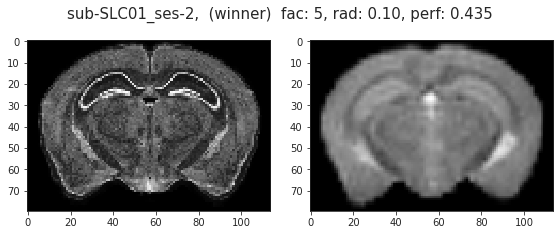

In [ ]:
%%time

reg.set_mode('bold')
reg.mi_base = None

for key, anat in mice.T1w.items():
    if 'ses-2' not in key:
        continue
    indiv = anat.load_ants()
    indiv *= mice.mask3d[key].load_ants()
    indiv = reg._prepare(indiv)

    results = reg.fit_register(
        name=key,
        moving=indiv,
        fixed=reg.nissl,
        save_results=True,
        **kwargs
    )

## End

Apr ??th, 2022, ??:?? ??